In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as marker
from PIL import Image
from sklearn.decomposition import PCA

/Users/nick/miniforge3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the data
facedata = np.loadtxt( 'faces.dat')

Question A

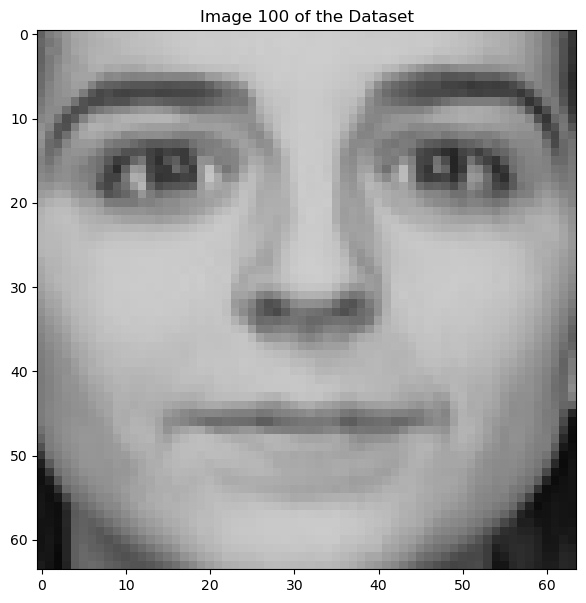

In [21]:
#Define function to display nth image
def displaynimage(n,array,label="No Label"):

    #Do some processing
    x = array[n-1]
    a = np.swapaxes(np.resize(x,(64,64)).reshape(64, 64), 0, 1)
    #Plot image below the cell
    plt.imshow(Image.fromarray(a),cmap='gray')
    plt.title(label)
    

#Display image 100
displaynimage(100,facedata, "Image 100 of the Dataset")

### Question B

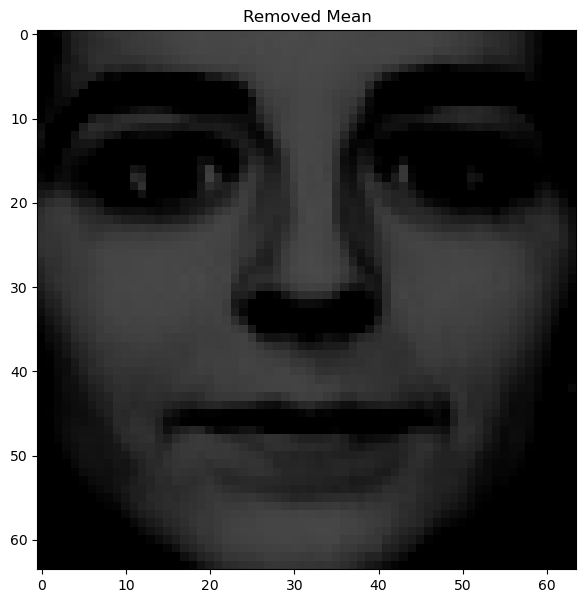

In [22]:
#Remove mean of each image
meanImages = []
for x in range(len(facedata)):

    #Remove the mean of the image
    meanImages.append(facedata[x] - int(np.mean(facedata)))

#Display 100th image with no mean
displaynimage(100,meanImages,"Removed Mean")

### Question C

Text(0, 0.5, 'Value')

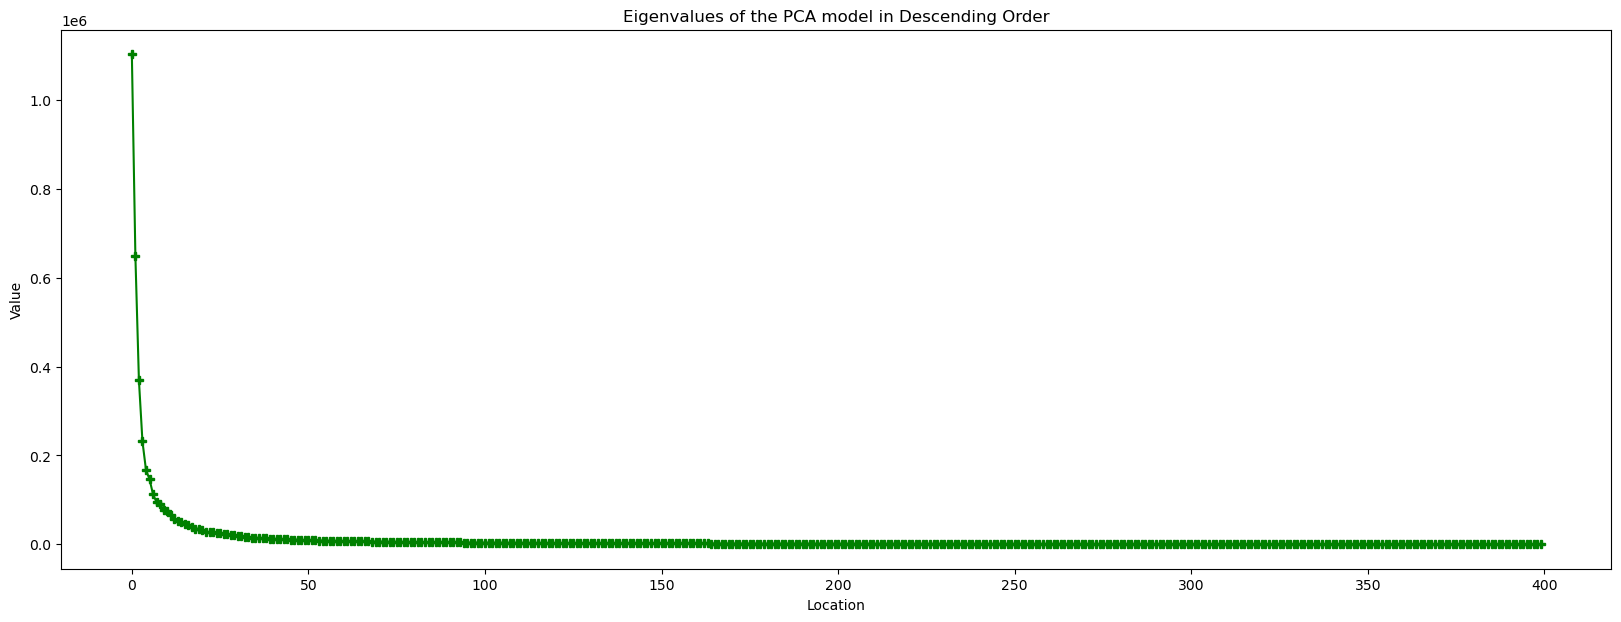

In [23]:
#Use sklearn PCA tool, use 400 components
pca = PCA(n_components=400)

#Fit the model to the data
X_train = pca.fit_transform(meanImages)

#Sort the eigenvalues in descending order
#pca.explained_variance_ are the eigenvalues from the PCA model
eigenvalues = pca.explained_variance_ 

#sort in descending order
reverse_array = np.sort(eigenvalues)[::-1] 

#Plot eigenvalues in descending order
plt.plot(reverse_array,c='green',marker="P")
plt.title("Eigenvalues of the PCA model in Descending Order")
plt.xlabel("Location")
plt.ylabel("Value")

### Question D 

In [6]:
#Look at value 400
print("400th Eigenvalue:", reverse_array[399])

400th Eigenvalue: 1.6076397455156887e-26


### Question E

PC_4
PC_5
PC_6
PC_7
PC_8
PC_9
PC_10
PC_11
PC_12
PC_13
PC_14
PC_15
PC_16
PC_17
PC_18
PC_19
PC_20
PC_21
PC_22
PC_23
PC_24
PC_25
PC_26
PC_27
PC_28
PC_29
PC_30
PC_31
PC_32
PC_33
PC_34
PC_35
PC_36
PC_37
PC_38
PC_39
PC_40
PC_41
PC_42
PC_43
PC_44
PC_45
PC_46
PC_47
PC_48
PC_49
PC_50
PC_51
PC_52
PC_53
PC_54
PC_55
PC_56
PC_57
PC_58
PC_59
PC_60
PC_61
PC_62
PC_63
PC_64
PC_65
PC_66
PC_67
PC_68
PC_69
PC_70
PC_71
PC_72
PC_73
PC_74
PC_75
PC_76
PC_77
PC_78
PC_79
PC_80
PC_81
PC_82
PC_83
PC_84
PC_85
PC_86
PC_87
PC_88
PC_89
PC_90
PC_91
PC_92
PC_93
PC_94
PC_95
PC_96
PC_97
PC_98
PC_99
PC_100
PC_101
PC_102
PC_103
PC_104
PC_105
PC_106
PC_107
PC_108
PC_109
PC_110
PC_111
PC_112
PC_113
PC_114
PC_115
PC_116
PC_117
PC_118
PC_119
PC_120
PC_121
PC_122
PC_123
PC_124
PC_125
PC_126
PC_127
PC_128
PC_129
PC_130
PC_131
PC_132
PC_133
PC_134
PC_135
PC_136
PC_137
PC_138
PC_139
PC_140
PC_141
PC_142
PC_143
PC_144
PC_145
PC_146
PC_147
PC_148
PC_149
PC_150
PC_151
PC_152
PC_153
PC_154
PC_155
PC_156
PC_157
PC_158
PC_159
PC_160
PC_

Text(0.5, 1, 'Analysis of Variance in Components')

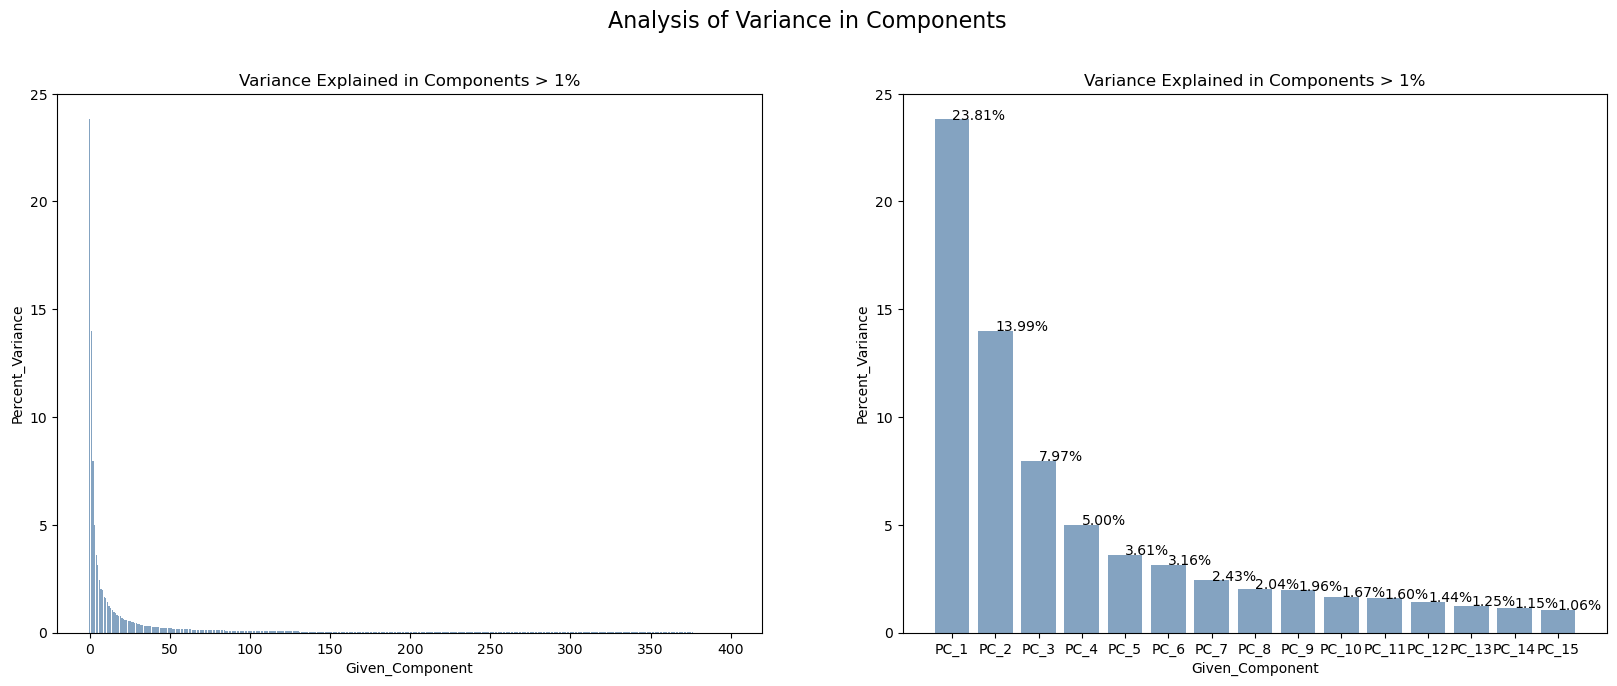

In [40]:
components = []
percent = []

#One plot for all the components to demonstrate the percent variance captured
plt.subplot(1,2,1)
for x in range(0,400):
    percent.append((reverse_array[x]/sum(reverse_array)*100))
    components.append(x)

    # if (sum(percent) > 85):
    #     print("PC_" +str(x+1))

    if (sum(percent) > 50):
        print("PC_" +str(x+1))

#Plot a bar graph of variance percentages over each component
plt.bar(components,percent,color=(0.2, 0.4, 0.6, 0.6))
plt.rcParams["figure.figsize"] = (25,8)
plt.title("Variance Explained in Components > 1%")
plt.xlabel("Given_Component")
plt.ylabel("Percent_Variance")

components = []
percent = []

#Another plot to show the most relevant component variance captured(>1%)
plt.subplot(1, 2,2)
for x in range(0,400):

    #This ensures we only get components with variance > 1%
    if ((reverse_array[x]/sum(reverse_array)*100) < 1):
        break

    percent.append((reverse_array[x]/sum(reverse_array)*100))
    components.append("PC_" +str(x+1))

  

#Plot a bar graph of variance percentages over each component
plt.bar(components,percent,color=(0.2, 0.4, 0.6, 0.6))
plt.rcParams["figure.figsize"] = (20,7)
plt.title("Variance Explained in Components > 1%")
plt.xlabel("Given_Component")
plt.ylabel("Percent_Variance")

#Add in labels to show the percentage values to a viewer
for index, value in enumerate(percent):
    plt.text(index, value, str("%.2f" % value + '%'))
plt.suptitle("Analysis of Variance in Components", fontsize=16,y=1)

### Question F

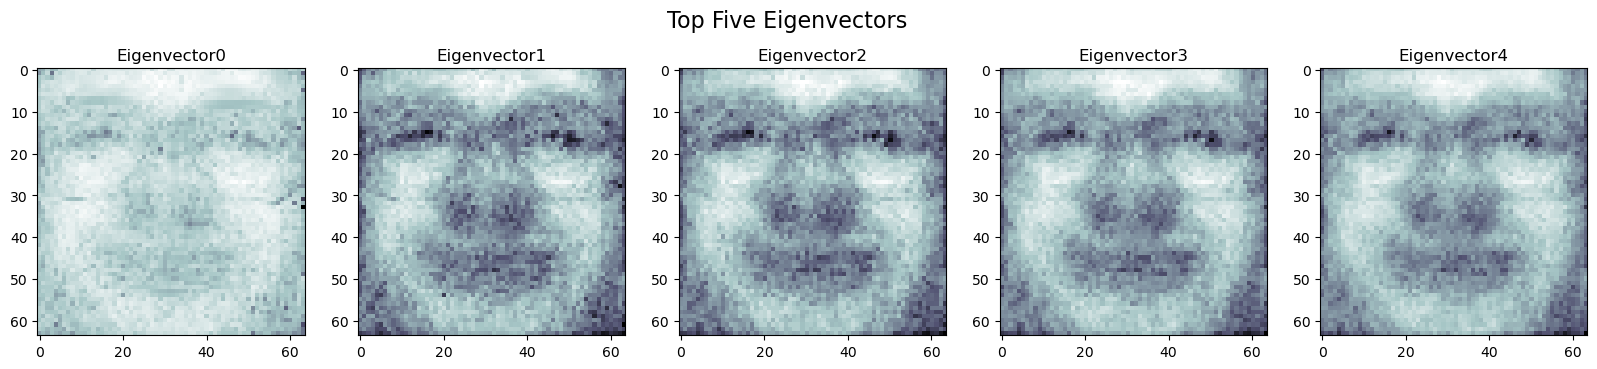

In [33]:
#Get the eigenvectors from the model - this is pca.components_
eig_vectors = pca.components_

#Get top five values
sorted_array = np.sort(eig_vectors,0)[0:5]

plt.suptitle("Top Five Eigenvectors", fontsize=16,y=0.77)

#Iteratively plot each of the eigenvectors
for idx in range(1,6):
    plt.subplot(1, 5, idx)
    plt.imshow(np.rot90(np.resize(sorted_array[idx-1],(64,64)),3),cmap="bone")
    plt.title("Eigenvector" + str(idx-1))

### Question G

In [35]:
#Function to perform PCA based on data, number of components, and specific image we want to view
#Made for convience
def PCA_Custom(data,n_components,desiredImageIndex):
    #Perform PCA with given component number
    pca = PCA(n_components=n_components)

    #Perform PCA 
    transformedData = pca.fit_transform(data)

    #We must do this to view the images
    transformedData = pca.inverse_transform(transformedData)
    
    #Display Image Below
    plt.imshow(Image.fromarray(np.rot90(np.resize(transformedData[desiredImageIndex],(64,64)),3)))

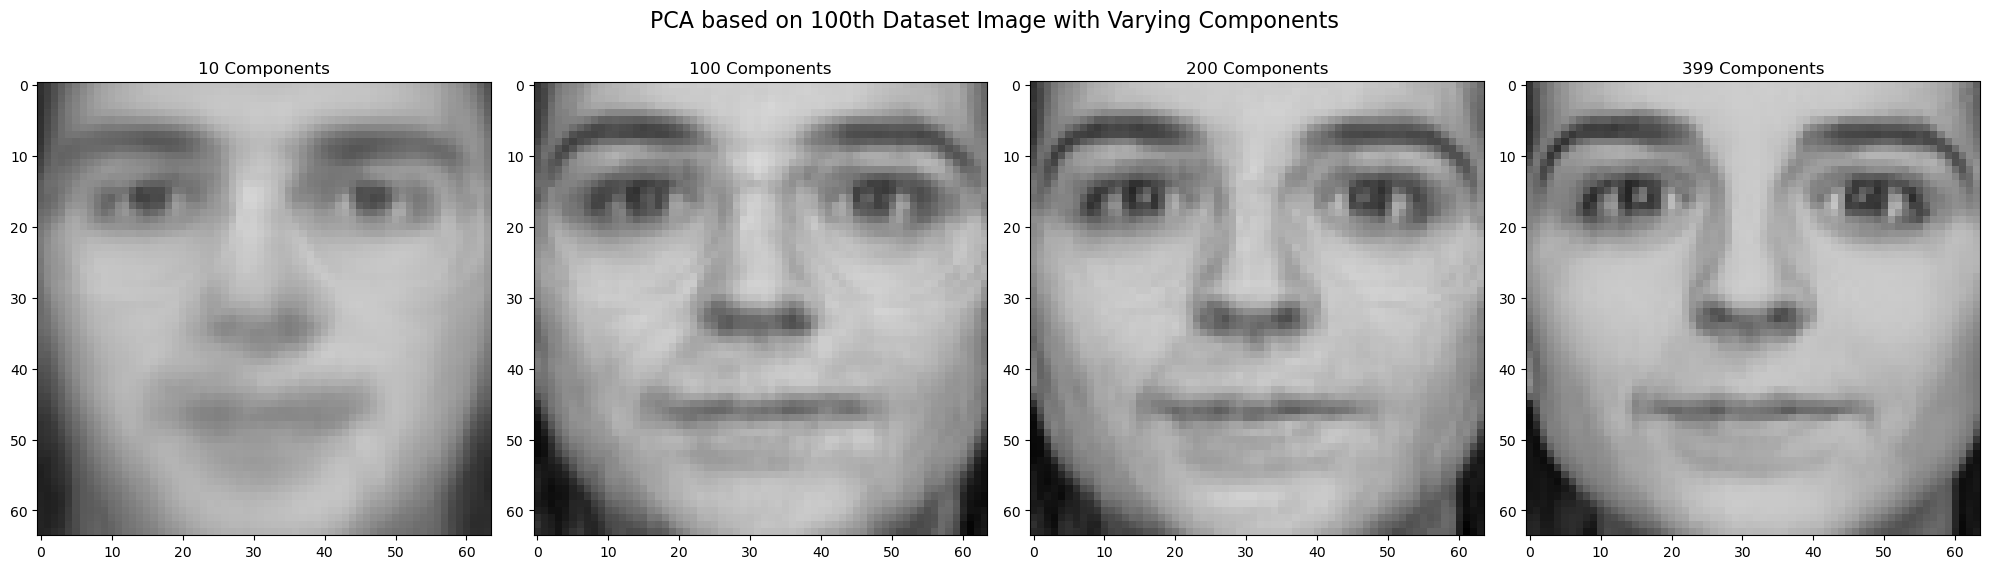

In [36]:
#Define the component numbers we want to demonsrate and test in a list
principle = [10,100,200,399]
plt.suptitle("PCA based on 100th Dataset Image with Varying Components", fontsize=16,y=0.90)

#Iterate through all the components, perform PCA, then show the 100th image
for x in range(0,len(principle)):
    
    #Subplot for visiblity 
    plt.subplot(1, len(principle), x+1)

    #Perform pca per component number asked
    PCA_Custom(facedata,principle[x],99)
    plt.title(str(principle[x]) + " Components")
plt.tight_layout()
